## KNN para regresión

Los siguientes son los pasos para la Regresión K-NN:

1. Encontrar los k vecinos más cercanos basados en distancias para x.
2. Promediar la salida de los K vecinos más cercanos de x.

In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

### Cargamos el dataset

In [18]:
# Colocamos la ruta al conjunto de datos en una variable para facilitar el acceso
advertising_file_path = "https://raw.githubusercontent.com/vbatiz/intro-ML/main/notebooks/datasets/advertising.csv"
# Leemos los datos y los almacenamos en un dataframe llamado melbourne_data
advertising_data = pd.read_csv(advertising_file_path, index_col=0)
# Desplegamos un resumen de los datos del dataframe
advertising_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [19]:
advertising_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [20]:
advertising_data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [21]:
advertising_data = advertising_data.dropna(axis=0)

In [22]:
advertising_data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [23]:
advertising_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Elegimos el valor a predecir

In [24]:
y = advertising_data.Sales
print(y)

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64


### Elegimos las características (features) a utilizar como predictores

In [38]:
advertising_features = ["TV","Radio", "Newspaper"]

In [39]:
X = advertising_data[advertising_features]

In [40]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


### Graficamos las variables

In [ ]:
# Usar cuando X sea una sola variable
plt.scatter(X,y)
plt.xlabel('Presupuesto en TV en 1000$' ,fontsize=20)
plt.ylabel('Ventas en 1000$',fontsize=20)
plt.title('Gráfica de dispersión',fontsize=25)

### Creamos los conjuntos de entrenamiento y prueba

In [42]:
# Entrenamiento y prueba 
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

### Construimos el modelo

Text(0.5, 1.0, 'ELBOW PLOT')

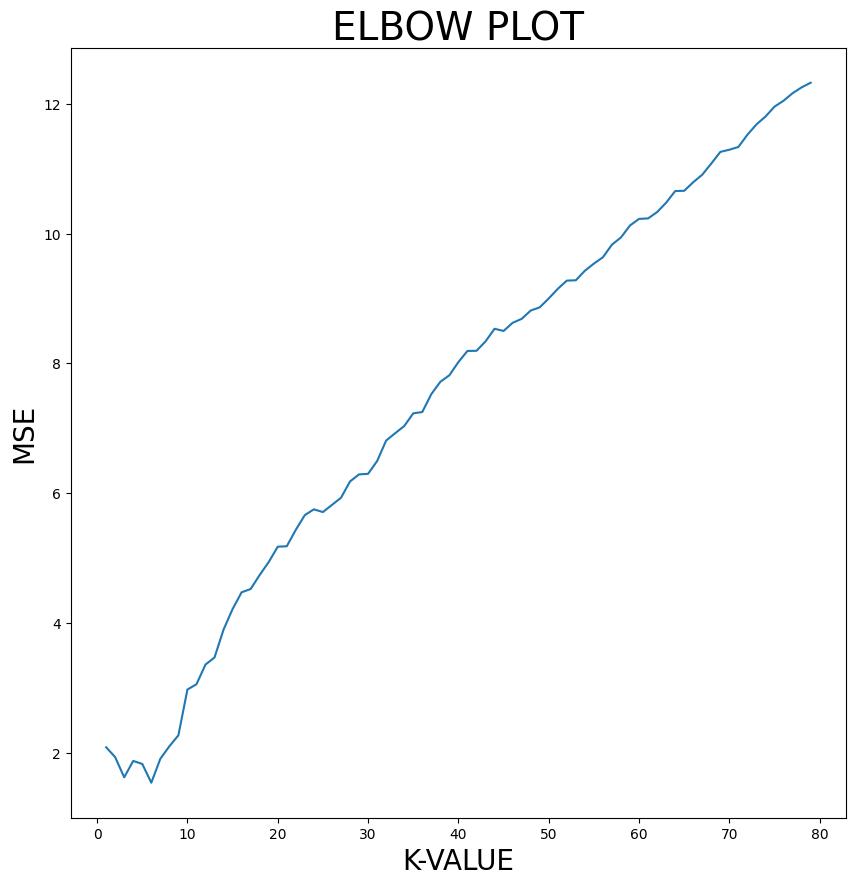

In [43]:
fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,80,1)
knn_dict={} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(x_train,y_train)
    y_knn_pred=model_knn.predict(x_test)
#Storing MSE 
    mse=mean_squared_error(y_test,y_knn_pred)
    knn_dict[i]=mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)

In [44]:
#Knn Model Creation
knn=KNeighborsRegressor(n_neighbors=8)
model_knn=knn.fit(x_train,y_train)
y_knn_pred=model_knn.predict(x_test)
#Storing MSE 
mse=mean_squared_error(y_test,y_knn_pred)
print(mse)

2.1001901041666664
